In [1]:
import matplotlib.pylab as pl
%matplotlib inline
import numpy as np
from utilities.data_utility import load_cifar10
from scipy.stats import norm as gaussian

In [2]:
data = load_cifar10(path='utilities/cifar/', center=True, rescale=True)

In [12]:
linespace = np.linspace(-3, 3)

In [3]:
X = data[0]

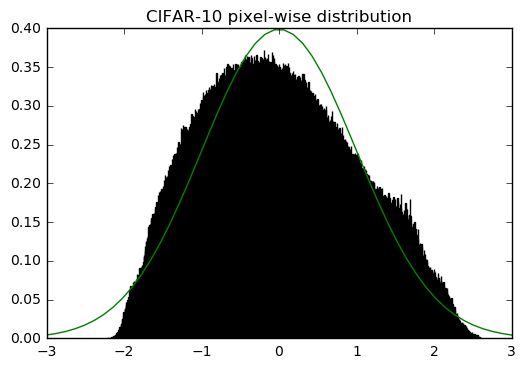

In [13]:
pl.hist(X.flatten(), bins=1024, normed=True)
pl.plot(linespace, gaussian.pdf(linespace))
pl.title('CIFAR-10 pixel-wise distribution')

In [96]:
n = 0

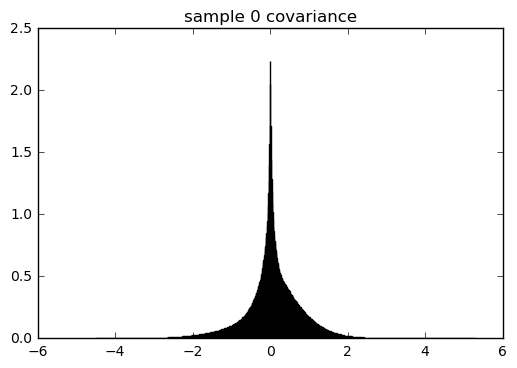

In [95]:
covariance = np.outer(X[n], X[n].T)
pl.figure()
pl.hist(covariance.flatten(), bins=1024, normed=True)
pl.title('sample %d covariance' % n)
n += 1

In [16]:
expected_covariance = sum(np.outer(X[i], X[i].T) for i in range(8)) / float(20)

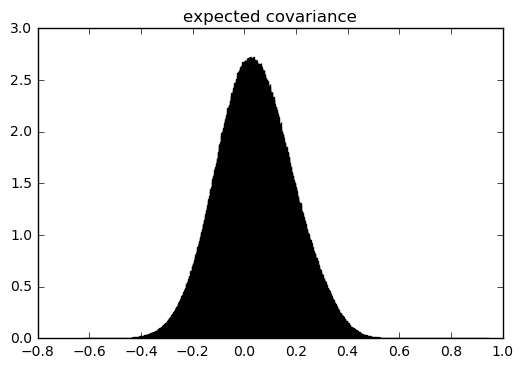

In [17]:
pl.hist(expected_covariance.flatten(), bins=1024, normed=True)
pl.title('expected covariance')

In [104]:
n = 0

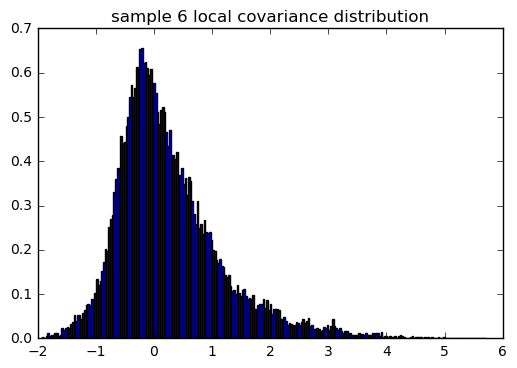

In [112]:
image = X[n].reshape((3, 32, 32)).sum(axis=0)
# image = X[n].reshape((3, 32, 32))[0]
kernel_X, kernel_Y = 16, 16
expected_local_covariance = 0
for i in range(33 - kernel_Y):
    for j in range(33 - kernel_X):
        local_image = image[i : i + kernel_Y, j : j + kernel_X].flatten()
        covariance = np.outer(local_image, local_image.T)
        expected_local_covariance += covariance
expected_local_covariance /= float((33 - kernel_X) * (33 - kernel_Y))
pl.hist(expected_local_covariance.flatten(), bins=kernel_X * kernel_Y, normed=True)
pl.title('sample %d local covariance distribution' % n)
n += 1

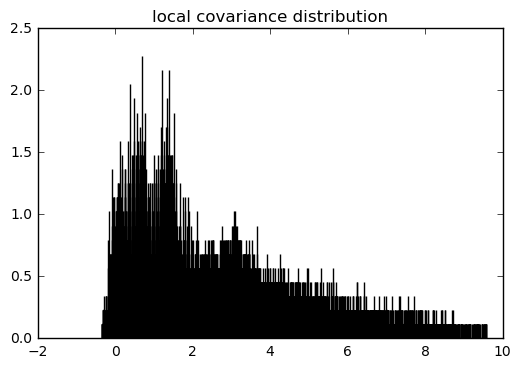

In [18]:
kernel_X, kernel_Y = 16, 16
total_expected_local_covariance = 0
N = 10
for n in range(N):
    image = X[n].reshape((3, 32, 32)).sum(axis=0)
    expected_local_covariance = 0
    for i in range(33 - kernel_Y):
        for j in range(33 - kernel_X):
            local_image = image[i : i + kernel_Y, j : j + kernel_X].flatten()
            covariance = np.outer(local_image, local_image.T)
            expected_local_covariance += covariance
    expected_local_covariance /= float((33 - kernel_X) * (33 - kernel_Y))
    total_expected_local_covariance += expected_local_covariance
total_expected_local_covariance /= float(N)
pl.hist(total_expected_local_covariance, bins=(33 - kernel_X) * (33 - kernel_Y), normed=True)
pl.title('local covariance distribution')